#  Exploratory Data Analysis (EDA) : Haberman’s Cancer Survival Dataset


---
1.   Objective 
2.   Introduction to Haberman’s Cancer Survival Dataset 
3. Bivariate Anaysis
4. Univariate Analysis
5. Conclusion 


### What is EDA?



It is a task of analysing data using certain tools to understand dataset before we model them to machine learning. Tools include linear algebra, statistics, simple ploting tools, for any given problem or Dataset, this is the first step we do.







##1. Objective

---

*  Our objective is to **Predict whether the patient will survive or not after 5 years of treatment based on it's age, year and no of nodes**.
* We have to find out which field can make our model more reliable.




##2. Introduction to Haberman’s Cancer Survival Dataset


---



The dataset contains case study that was done between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

There are following fields in the dataset:
*   Age of patient at time of operation 
*   Patient’s year of operation
*   Number of positive auxillary nodes detected
*  Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years



**Lets Look Into Dataset**
1. Import pandas, numpy
2. Import csv into a Pandas DataFrame object called 'haberman'

In [0]:
import pandas as pd
haberman = pd.read_csv('/content/drive/My Drive/haberman.csv');
haberman

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


Checking the shape of our dataset in (rows, columns) format

In [0]:
#  1. (Q) how many data-points and features?
print(haberman.shape)

(306, 4)


In [0]:
# 2. (Q) What are the column names in our dataset?
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [0]:
# checking if any null value is present in the dataset
isNullCOunt = haberman.isnull().sum()
isNullCOunt

age       0
year      0
nodes     0
status    0
dtype: int64

In [0]:
# 3. (Q) How many data points for each status are present? 
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

**Conclusion**


*   From total 306 people, we have 225 people who survived the operation for 5 or more years and 81people who died within 5 years
*   Therefore, our DataSet is not balanced.



In [0]:
#haberman.info()
haberman['status'] = haberman['status'].map({1:'success', 2:'failure'})
haberman.tail()

,age,year,nodes,status
301,75,62,1,success
302,76,67,0,success
303,77,65,3,success
304,78,65,1,failure
305,83,58,2,failure


For the purpose of simplicity and readability, we will changes the values of 'status' column in our dataset from 1 and 0 to sucess and failure respectively. Where success means person survived and failure means person could not survive.

In [0]:
haberman.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


 **Obeservation** 


*   Age of the patients resides from 30 to 83 with where median of age is 52.
*   Here maximum number of positive nodes is 52.
*  Total no of records that our dataset contains is 306.


##3. Bivariate Analysis

---



### 2D Scatter Plot


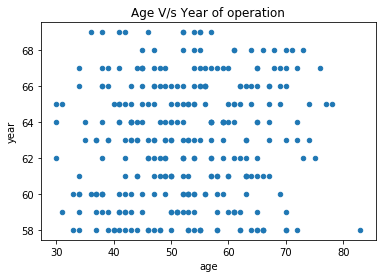

In [0]:
import matplotlib.pyplot as pt
# dataframe.plot(kind='KIND OF GRAPH', x='X AXIS', y='Y AXIS')
haberman.plot(kind='scatter', x='age',y='year')
pt.title('Age V/s Year of operation')
pt.show()

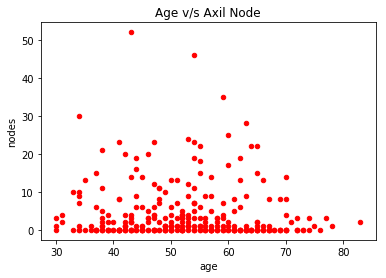

In [0]:
haberman.plot(kind='scatter', x = 'age', y='nodes', color='r')
pt.title('Age v/s Axil Node')
pt.show()

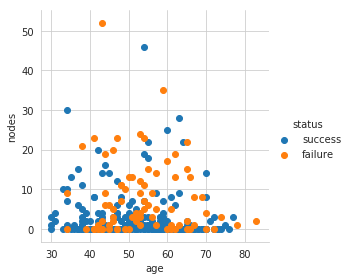

In [0]:
import seaborn as sns

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4).map(pt.scatter, "age", "nodes").add_legend();
pt.show();

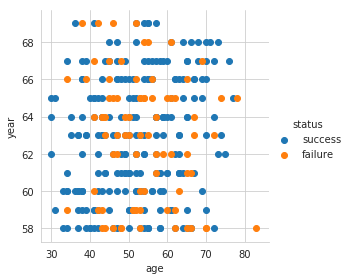

In [0]:
import seaborn as sns

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4).map(pt.scatter, "age", "year").add_legend();
pt.show();

**Observation**

*   Nothing is clear from 2D scatter plot, since there is lot of overlapping betweeen point




### Pair Plot

---




*   Pair-plot is used for the multi-variate analysis
*   It helps in visualising the relationship between two variables, by  ploting graph between every two data columns in a given dataframe. 

*   Hence all columns of the Dataframe is analysed using pairplot








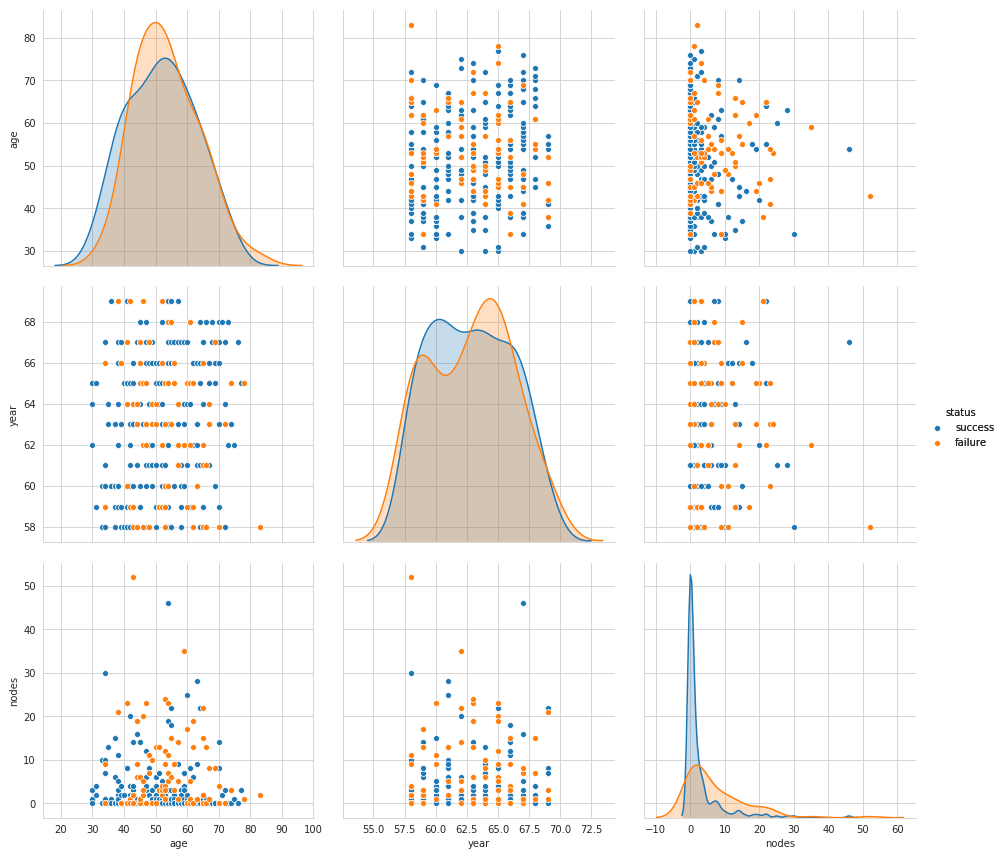

In [0]:
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", height=4).add_legend();
pt.show()

**Pair Plot Observations**


1.   It's difficult to specify which 2 variable can classify our observation in status 'success' or 'failure'. Since, datapoints are not seperated in linear manner in any of the plots.
2. The plot between 'year' and 'nodes' is comparatively better, still we don't have clear picture.



## 4.Univariate Analysis

---



**Introduction**

Here we have three independent features like 'age','year','nodes'. So we will perform analysis on each feature individually and try to find out some patterns. 



### Probability Density Function(PDF)


*   Probability Density Function (PDF) is the probability that the variable takes a value x.
*    Here the height of the bar denotes the percentage of data points under the corresponding group
*   The height of the plot represents the no of points that lie between that a range.
*   The plot is done between 0 and 1 on y axis, they represent the count.
*   Smothen version of Histogram is reffered as PDF, when lines are drawn. 




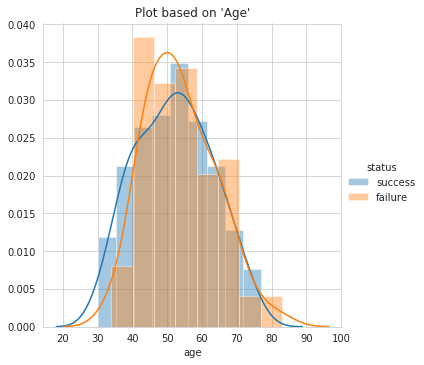

In [0]:
sns.FacetGrid(haberman,hue='status',height = 5).map(sns.distplot,'age').add_legend();
pt.title("Plot based on 'Age'")
sns.set_style("whitegrid");
pt.show()

**Observation**

*   Plot has overlapping, points are not clear. Therefore, 'age' alone cannot decide the survival chance.
*   But, people whose age lies between 30-40 have chance of survival compared to age between 40-60.



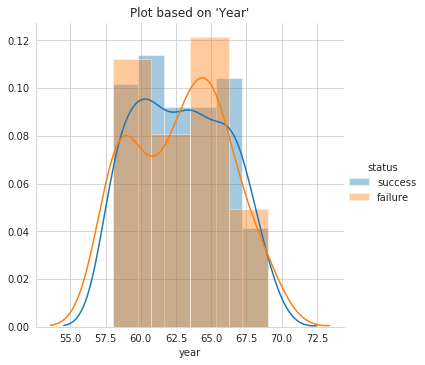

In [0]:
sns.FacetGrid(haberman,hue='status',height = 5).map(sns.distplot,'year').add_legend();
pt.title("Plot based on 'Year'")
sns.set_style("whitegrid");
pt.show()

**Observation**

*   This graph is also overlapping, in year 1958 to 1960 and 1963 to1966 survival rate was low.




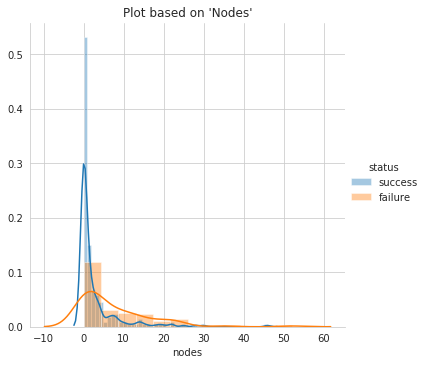

In [0]:
sns.FacetGrid(haberman,hue='status',height = 5).map(sns.distplot,'nodes').add_legend();
pt.title("Plot based on 'Nodes'")
sns.set_style("whitegrid");
pt.show()

**Observation**

*   When nodes value is 0 or 1 patients are more likely to survive. After 25 years there are very low chance of survival. This plot is clear
*  Since this plot gives us quite clear picture, Therefore 'Nodes' can help us in classifying our model in better way.



### Cumulative Distribution Function (CDF)

*   The Cumulative Distribution Function (CDF) is the probability that the variable takes a value less than or equal to x.
*   In another words, CDF says what percentage of dataColumn has a value less than equal to coressponding x-axis point.
*  Nothing can be less than 0 probability and more than 1 probability, because probability lies between 0 to 100%.

**Note** : When we differentiate PDF we get CDF

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


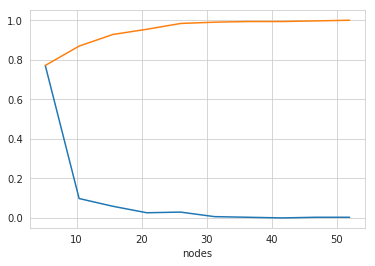

In [0]:
import numpy as np
counts, bin_edges = np.histogram(haberman['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
pt.xlabel('nodes')
pt.plot(bin_edges[1:],pdf)
pt.plot(bin_edges[1:], cdf)

[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


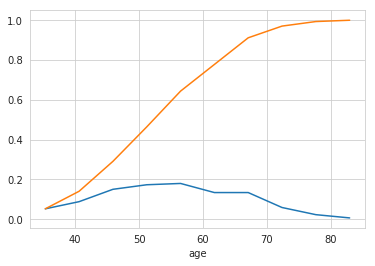

In [0]:
import numpy as np
counts, bin_edges = np.histogram(haberman['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#  print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
pt.xlabel('age')
pt.plot(bin_edges[1:],pdf)
pt.plot(bin_edges[1:], cdf)

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


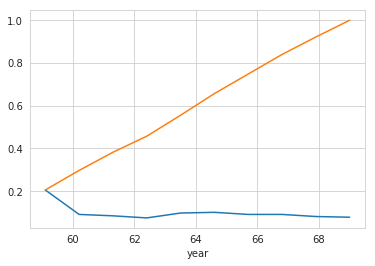

In [0]:
import numpy as np
counts, bin_edges = np.histogram(haberman['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
pt.xlabel('year')
pt.plot(bin_edges[1:],pdf)
pt.plot(bin_edges[1:], cdf)


**Observation**

*   We can see that, the CDF graph plotted for 'node' only gives us the clear picture.
*   Approximatly 80% of patient survived after 5 years, who had 'nodes' less than 10.



### Box Plot with Whiskers


*   In this technique we plot graph which represents quarties. 
*   Points that are beyond the whiskers are refferd as Outliers.



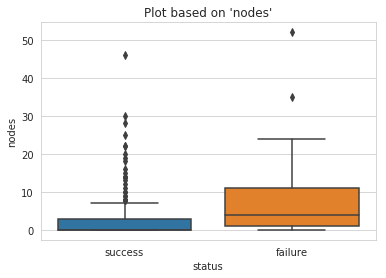

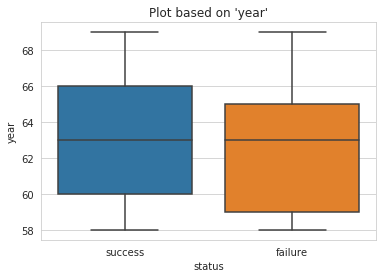

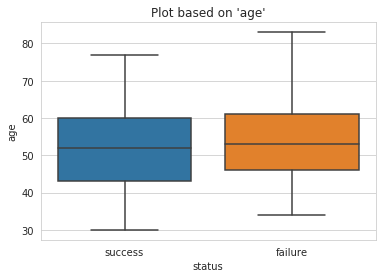

In [0]:
sns.boxplot(x='status',y='nodes', data=haberman)
pt.title("Plot based on 'nodes'")
pt.show()
sns.boxplot(x='status',y='year', data=haberman)
pt.title("Plot based on 'year'")
pt.show()
sns.boxplot(x='status',y='age', data=haberman)
pt.title("Plot based on 'age'")
pt.show()

**Observation**

*  Lesser the no of nodes higher the chance of survival.
*  We can also say that, patient between approx age 42 to 47 has better chance of survival. Though this is not the strong observation
* Operation performed between year 1965 - 66 had better chance of survival, again this is not a strong observation.


### Violin Plot

*   When we combine benefits of box plot and pdf,  what we get is violin plot
*   Center white color  - It represents the 50th percentile

*   Top corner - It  represents the 75th percentile
*   Bottom corner - It  represents the 25th percentile






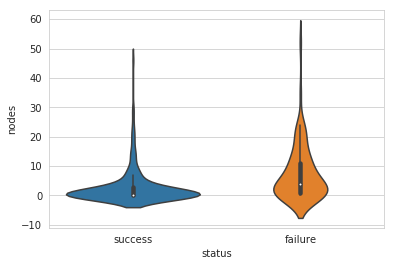

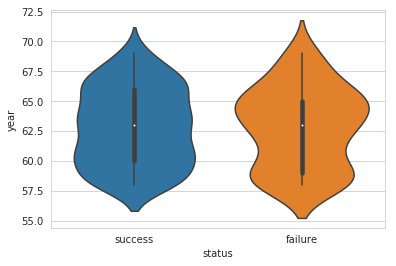

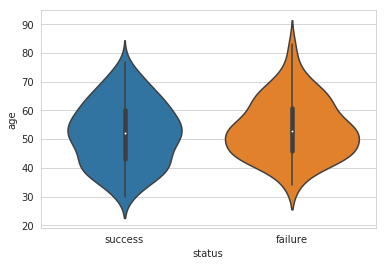

In [0]:
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
pt.show()

sns.violinplot(x="status", y="year", data=haberman, size=8)
pt.show()

sns.violinplot(x="status", y="age", data=haberman, size=8)
pt.show()

**Observation**


*   Patients which had more than 1 node were less likely to survive. Hence, higher the number of nodes, lesser the chance of survival.



## 5.Conclusion


*   We can say that, Survival chance of patient is inversely proportional to the number of  nodes. More the number of node lesser the chance of survival.
*   Age and Year cannot alone lead to any conclusion.

